In [1]:

from scipy.stats import rankdata
import pandas as pd

#下面是alpha101里面的一些函数
def ts_sum(df, window=10):
    """
    Wrapper function to estimate rolling sum.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """

    return df.rolling(window).sum()


def sma(df, window=10):
    """
    Wrapper function to estimate SMA.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return df.rolling(window).mean()


def stddev(df, window=10):
    """
    Wrapper function to estimate rolling standard deviation.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return df.rolling(window).std()


def correlation(x, y, window=10):
    """
    Wrapper function to estimate rolling corelations.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return x.rolling(window).corr(y)


def covariance(x, y, window=10):
    """
    Wrapper function to estimate rolling covariance.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return x.rolling(window).cov(y)


def rolling_rank(na):
    return rankdata(na)[-1]


def ts_rank(df, window=10):
    return df.rolling(window).apply(rolling_rank)


def rolling_prod(na):
    return np.prod(na)


def product(df, window=10):
    return df.rolling(window).apply(rolling_prod)


def ts_min(df, window=10):
    return df.rolling(window).min()


def ts_max(df, window=10):
    return df.rolling(window).max()


def delta(df, period=1):
    return df.diff(period)


def delay(df, period=1):
    return df.shift(period)


def rank(df):
    return df.rank(pct=True, axis=1)


def scale(df, k=1):
    return df.mul(k).div(np.abs(df).sum())


def ts_argmax(df, window=10):
    return df.rolling(window).apply(np.argmax) + 1


def ts_argmin(df, window=10):
    return df.rolling(window).apply(np.argmin) + 1

def trimP(series,q=0.98):
    s = series.copy()
    s.quantile(q)
    s[s > s.quantile(q)] = np.nan
    return s
def trimN(series,q=0.01):
    s = series.copy()
    s.quantile(q)
    s[s < s.quantile(q)] = np.nan
    return s



In [2]:
## 下面是回测部分

from backtest1 import *

## 导入数据，最后factor_df的index是dateStr，column是股票code。和导入的数据一样，可以尝试打印open等来看看。
open = pd.read_pickle('./data/open.pkl')
close = pd.read_pickle('./data/close.pkl')
vwap = pd.read_pickle('./data/vwap.pkl')
## 定义因子名
factor_name='alpha001'
# 计算因子,不需要shift，回测函数里会自动将t-1计算因子用到t
# 注意不要应用未来数据
factor_df =open-close

factor_df = do_capsec(factor_df,cap_indus_factor,sec2)

## 中值化选择性做，一般都各一遍，看看不同中值化下，因子的效果。
## 做市值行业中值化
# factor_capsecnue = do_capsec(factor)
## 做市值中值化
# factor_capnue = do_capsec(factor)
## 做行业中值化
# factor_secnue = do_capsec(factor)



standerdized_mean: 0.01223993766043019
standerdized_std: 0.6832277871923869
turnover: 1.2660695623432658
IC: 0.026


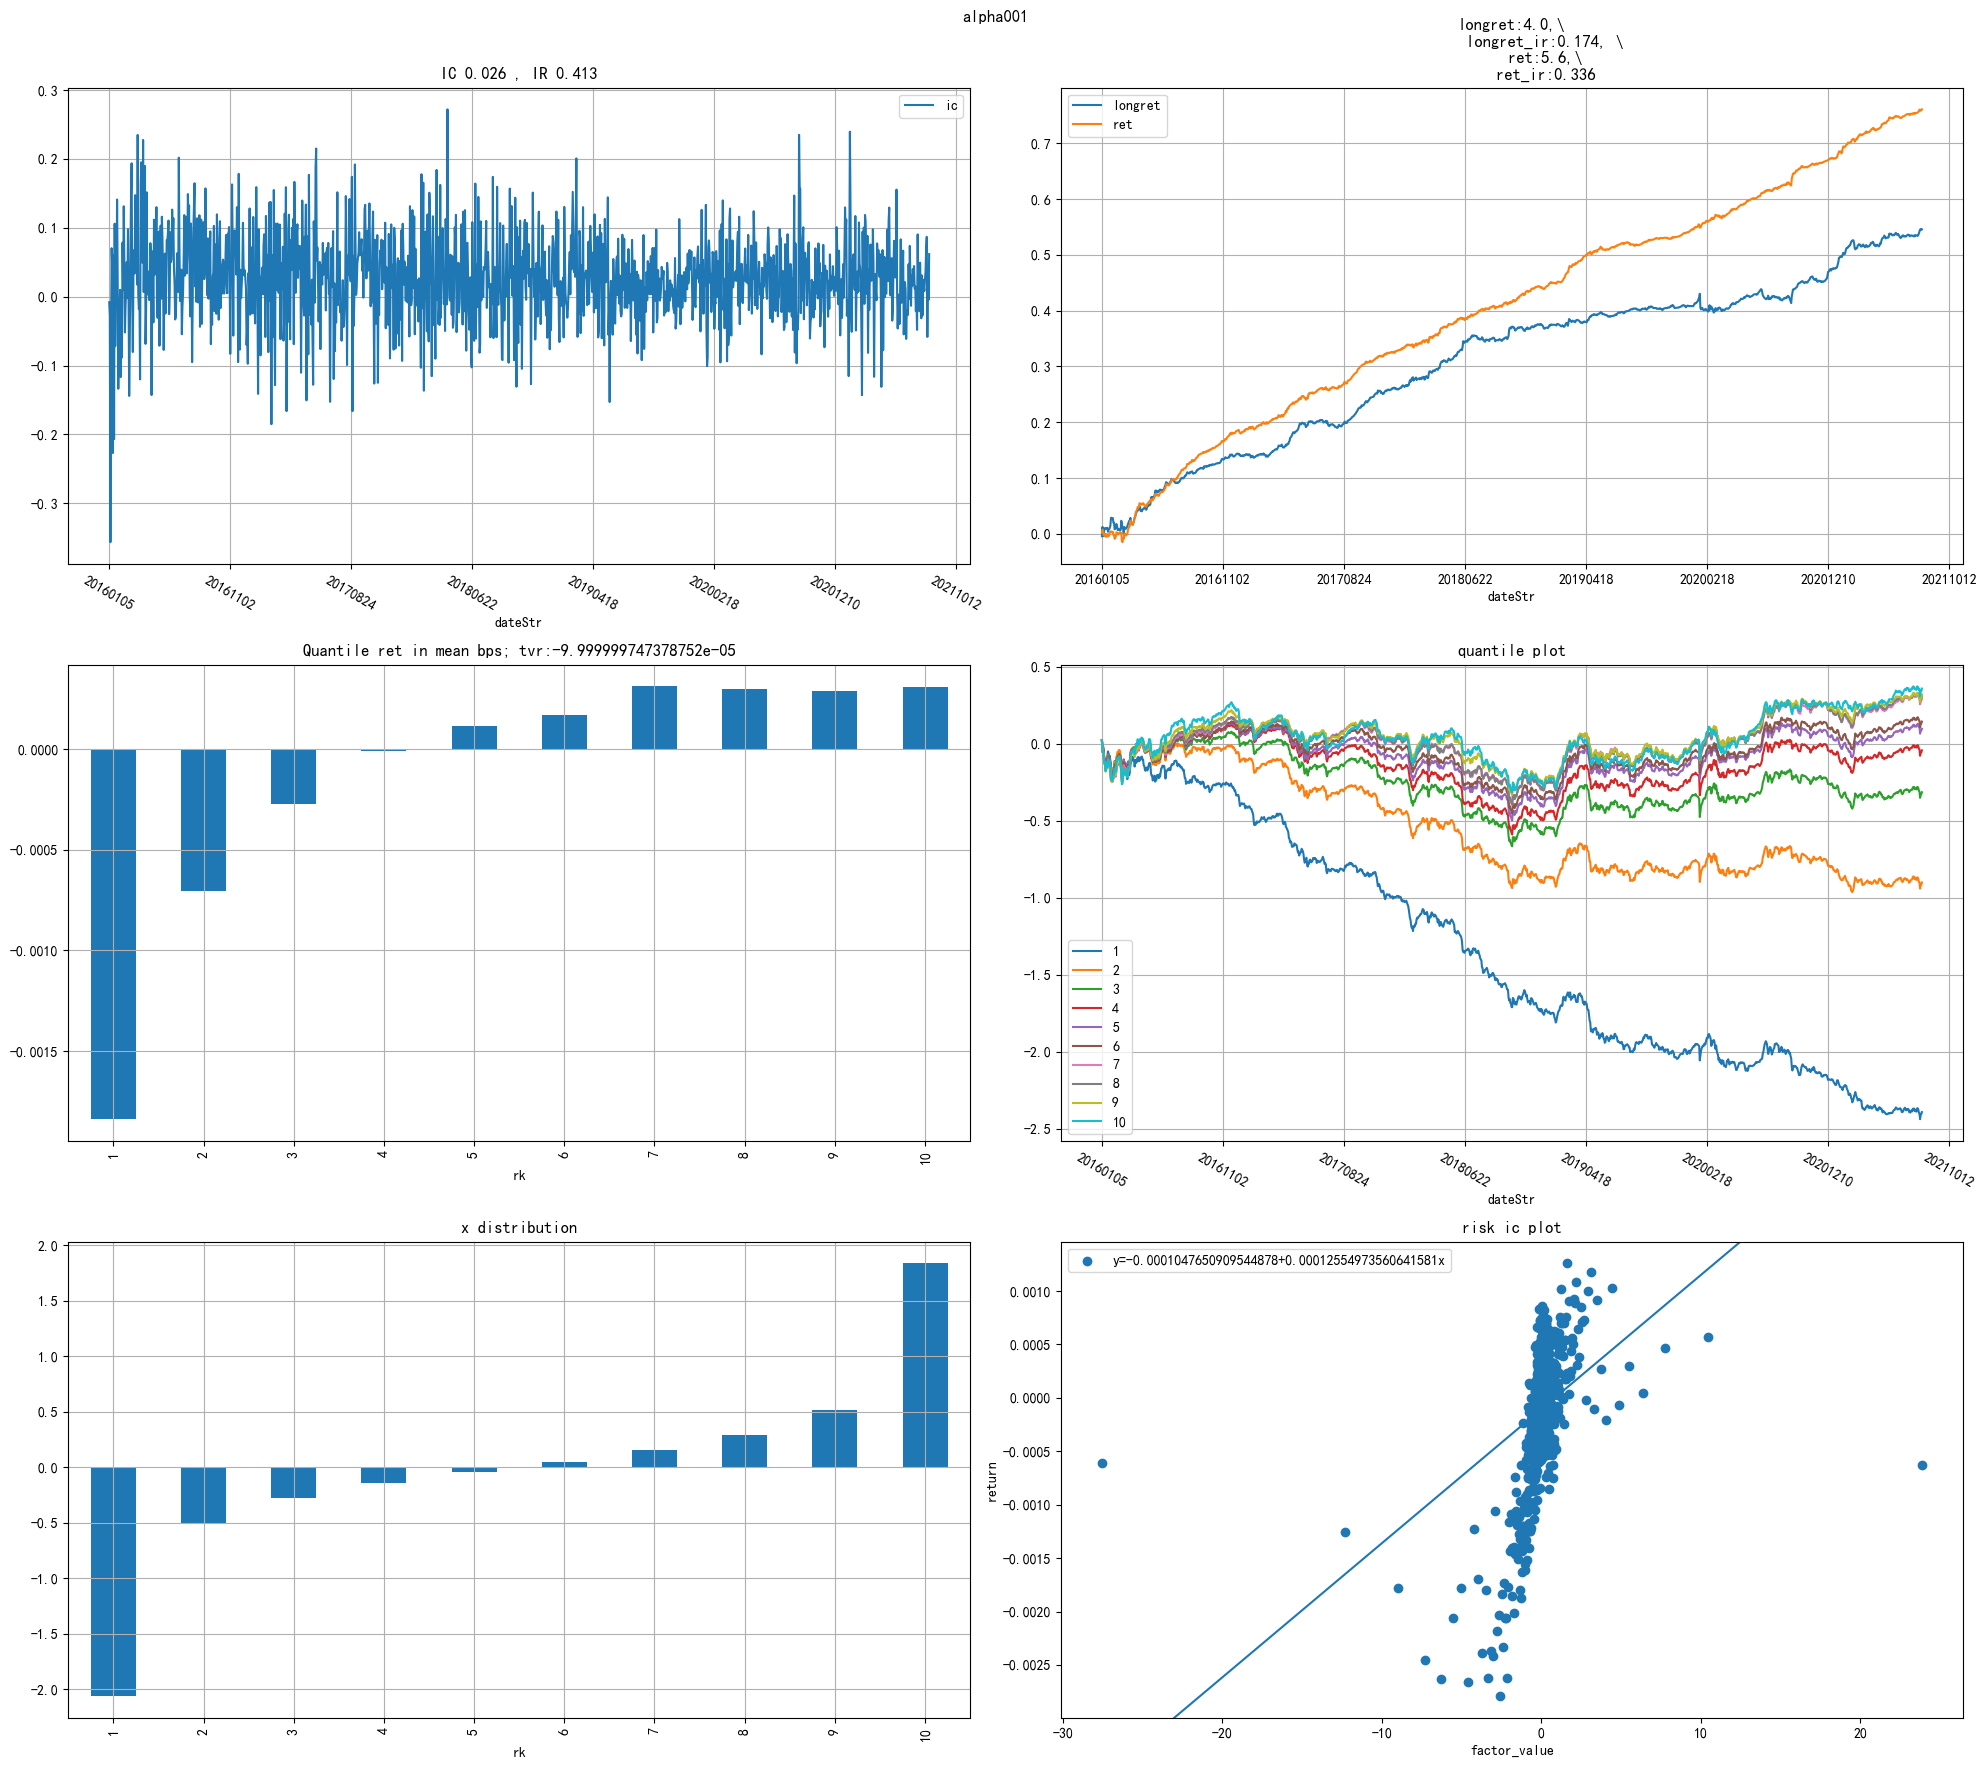

alpha001              from        to    return  pnl_per_day  win_rate    sharpe  \
2016     20160105  20161230  0.187959     0.000773  0.699588  4.795966   
2017     20170103  20171229  0.139538     0.000572  0.704918  6.062292   
2018     20180102  20181228  0.112226     0.000462  0.617284  4.548377   
2019     20190102  20191231  0.104419     0.000428  0.672131  5.922239   
2020     20200102  20201231  0.131762     0.000544  0.690083  5.868166   
2021     20210104  20211231  0.084990     0.000607  0.721429  6.479076   
summary  20160105  20211231  0.135794     0.000561  0.681416  5.231191   

         drawdown  dd_start    dd_end  win/loss  
2016    -0.017087  20160224  20160301  1.115050  
2017    -0.006654  20170519  20170526  1.141649  
2018    -0.005867  20180207  20180212  1.392068  
2019    -0.005151  20190527  20190603  1.433153  
2020    -0.005847  20200120  20200204  1.355195  
2021    -0.005103  20210209  20210219  1.239983  
summary -0.017087  20160224  20160301  1.264717 

In [3]:

"""
my_backtest可以定义的参数：
    self.ret = config.get('ret', 'return')   #回测用的收益率名称,不用管（别改）
    self.weight = config.get('weight', 'rank')#仓位权重计算方式,不用管（别改）
    self.nan = config.get('nan', 0) #没啥用
    self.start_date = config.get('start', 0)# 回测其实日期，0表示全部，字符串，如'20170121'
    self.end_date = config.get('end_date', 0)# 回测其实日期，0表示全部，字符串，如'20170121'。start和end如果一个为0 另一个必须为0 
    self.is_Class = config.get('is_Class', False)#用于测试事件型因子，因子值是1/-1
"""
bt = my_backtest(factor_df,factor_name)

""" 
plot_eval可以传入的参数：
     complex_ver 画复杂点（8个图）还是简单点（2个图）
     trimP   截断，当该值不为0时，大于该数值的因子变为NaN
     trimN  截断，当该值不为0时，小于该数值的因子变为NaN
     winsorP  缩尾，当该值不为0时，大于该数值的因子设置为该值
     winsorN   缩尾，当该值不为0时，小于该数值的因子设置为该值
     bool_standardize 是否标准化,默认为True
"""

bt.plot_eval()
